## Linking Google Drive to Colab

In [ ]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% cd /content/drive/MyDrive/1_LiveProjects/Project5_AgeGenderEmotion_Detection
! ls

/content/drive/MyDrive/Project5_AgeGenderEmotion_Detection
1.1_age_input_output	   2.2_train_gender_model.ipynb
1.2_gender_input_output    2.3_train_emotion_model.ipynb
1.3_emotion_input_output   3.1_Pred_Final.ipynb
1.4_test_input		   4.1_Project_Deck.pdf
2.1_train_age_model.ipynb


## Importing essential libraries

In [1]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


2024-04-20 12:42:40.658883: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 12:42:42.043906: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 12:42:42.049303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 12:42:47.147904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Loading Age/Gender/Emotion Models

In [2]:
# export_dir='./data/output/age_model_pretrained.h5'
# age_model = load_model(export_dir)

# # summarize model.
# age_model.summary()

In [89]:
# load and evaluate a saved model
export_dir='./data/output/gender_model_pretrained.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 70)        700       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 65)        41015     
                                                                 
 batch_normalization (Batch  (None, 96, 96, 65)        260       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 65)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 60)        35160 

In [104]:
export_dir='./data/output/emotion_model.h5'
emotion_model = load_model(export_dir)

# summarize model.
emotion_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [105]:
# Labels on Age, Gender and Emotion to be predicted

# age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
# emotion_ranges= ['sadness', 'contempt', 'disgust', 'fear', 'happy', 'surprise']
emotion_ranges= ['negative', 'positive', 'neutral']

## Loading Test Images

In [132]:
# img_path = "./1.4_test_input/images/priyanka_chopra.jpg"
# img_path = "./1.4_test_input/images/kartik_aryan.jpg"
img_path = "./data/smile3.jpg"

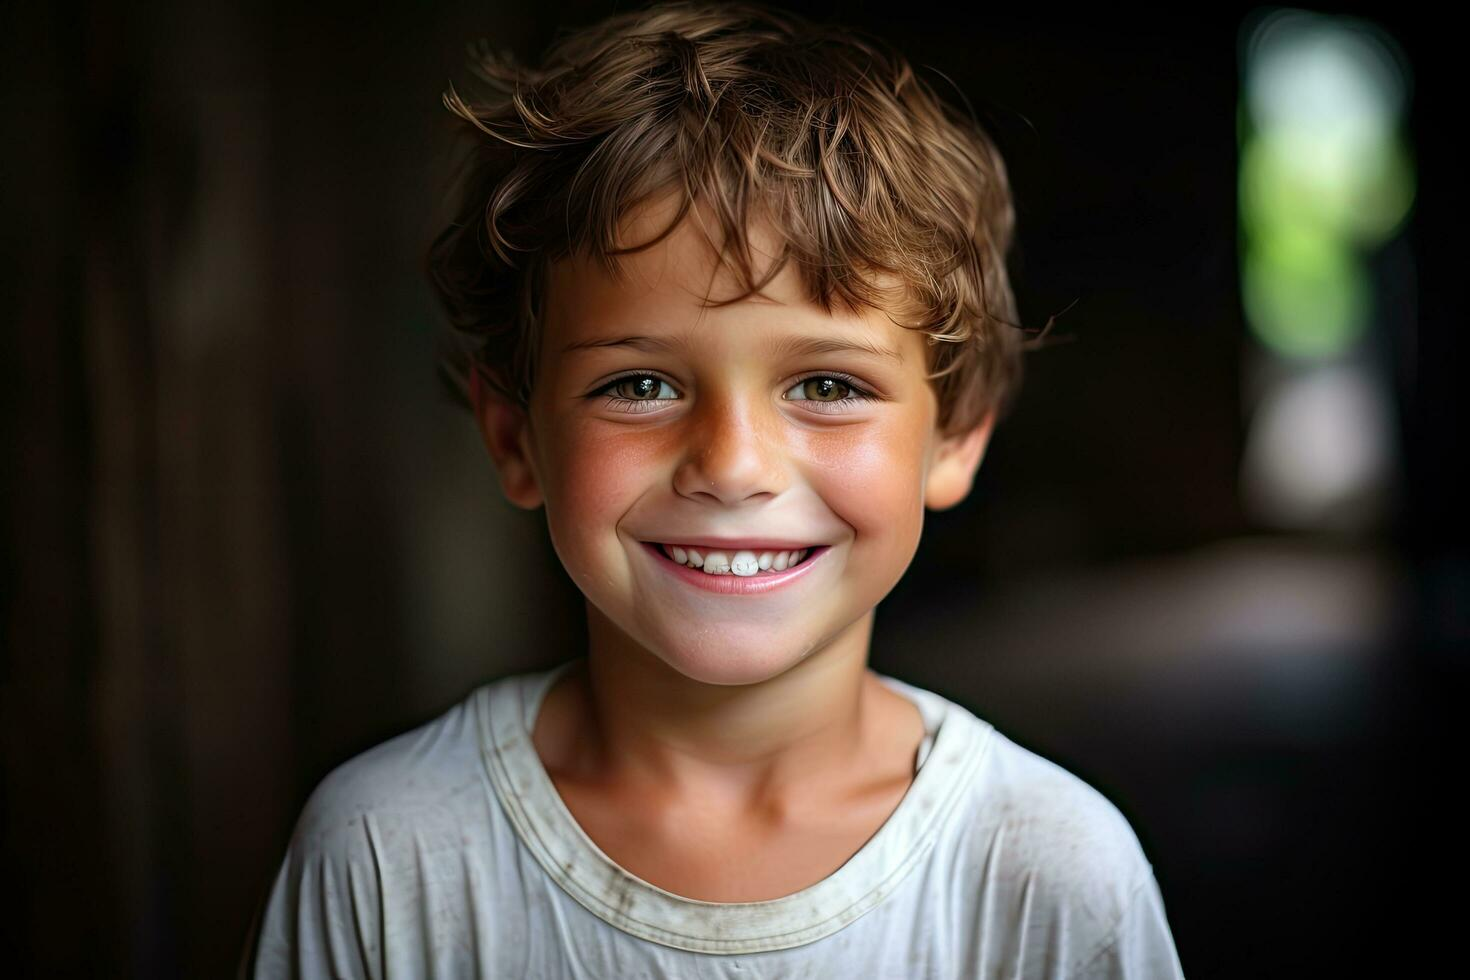

In [133]:
from IPython.display import Image 
pil_img = Image(filename=img_path)
display(pil_img)

## Results on Age/Gender/Emotion

[[[  2   4   5 ...  78  81  82]
  [  6   7   8 ...  87  67 100]
  [  9   7   6 ...  64  54  80]
  ...
  [ 30  25  21 ...  31  32  34]
  [ 27  23  19 ...  32  34  35]
  [ 24  23  25 ...  32  33  35]]]

1/1 [==============================] - 0s 20ms/step
1negative male


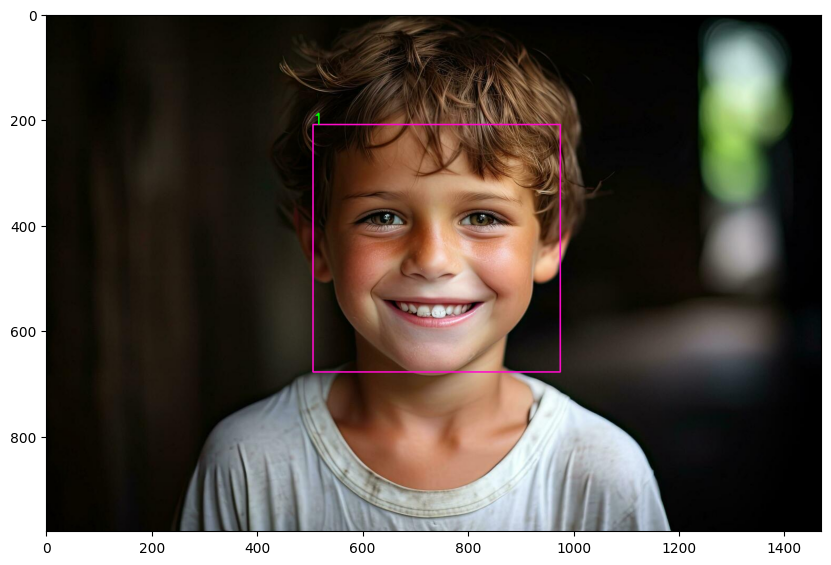

In [134]:
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
    i = i+1
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)
    
    img_gray=gray[y:y+h,x:x+w]
    # print(img_gray)
    emotion_img = cv2.resize(img_gray, (48, 48), interpolation = cv2.INTER_AREA)
    plt.imshow(cv2.cvtColor(emotion_img, cv2.COLOR_BGR2RGB))
    emotion_image_array = np.array(emotion_img)
    # print(emotion_image_array)
    emotion_input = np.expand_dims(emotion_image_array, axis=0)
    print(emotion_input)
    # print(np.argmax(emotion_model.predict(emotion_input)))
    print()
    output_emotion= emotion_ranges[np.argmax(emotion_model.predict(emotion_input))]

    gender_img = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)
    gender_image_array = np.array(gender_img)
    gender_input = np.expand_dims(gender_image_array, axis=0)
    output_gender=gender_ranges[np.argmax(gender_model.predict(gender_input))]

#     age_image=cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
#     age_input = age_image.reshape(-1, 200, 200, 1)
#     output_age = age_ranges[np.argmax(age_model.predict(age_input))]


    output_str = str(i) + output_emotion + ' '+ output_gender
    print(output_str)

    col = (0,255,0)

    cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

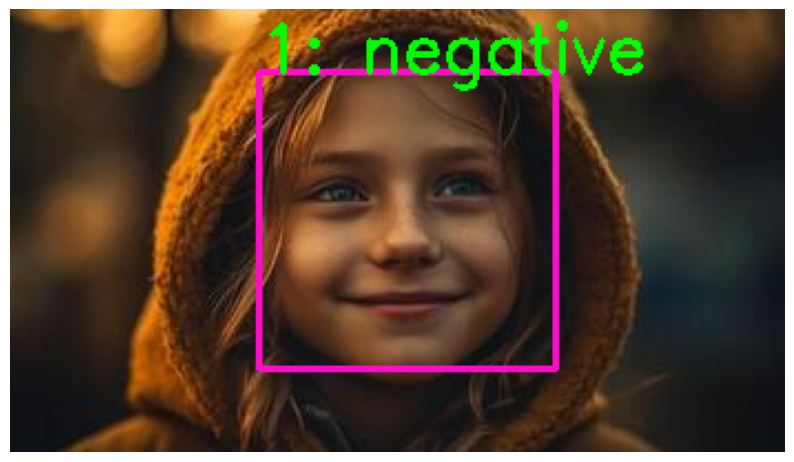

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load pre-trained emotion detection model
export_dir = './data/output/emotion_model.h5'
emotion_model = load_model(export_dir)

# Print model summary
emotion_model.summary()

# Define emotion ranges
emotion_ranges = ['negative', 'positive', 'neutral']

# Load the image
img_path = "./data/smile.jpg"
test_image = cv2.imread(img_path)
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Load the Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Loop through each face and predict emotion
for i, (x, y, w, h) in enumerate(faces):
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (203, 12, 255), 2)
    
    # Extract face ROI
    face_roi_gray = gray[y:y+h, x:x+w]
    # Resize face ROI to match the input size of the model
    emotion_img = cv2.resize(face_roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
    # Preprocess the image
    emotion_img = np.expand_dims(emotion_img, axis=-1)
    emotion_img = np.expand_dims(emotion_img, axis=0)
    emotion_img = emotion_img / 255.0
    # Predict the emotion
    prediction = emotion_model.predict(emotion_img)
    output_emotion = emotion_ranges[np.argmax(prediction)]

    output_str = str(i+1) + ": " + output_emotion
    print(output_str)

    # Draw text on the image with the predicted emotion
    col = (0, 255, 0)
    cv2.putText(test_image, output_str, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, col, 2)

# Convert image to RGB format for display using plt.imshow()
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes and predicted emotions
plt.imshow(test_image_rgb)
plt.axis('off')
plt.show()
